In [1]:
# set some ipython notebook properties
%matplotlib inline

# set degree of verbosity (adapt to INFO for more verbose output)
import logging
logging.basicConfig(level=logging.WARNING)

# set figure sizes
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

# set display width for pandas data frames
import pandas as pd
pd.set_option('display.width', 1000)

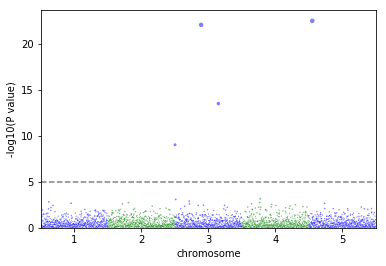

lambda=1.0078


,sid_index,SNP,Chr,GenDist,ChrPos,PValue,SnpWeight,SnpWeightSE,SnpFractVarExpl,Mixing,Nullh2
0,52,snp495_m0_.01m1_.04,5,4052,4052,2.990684e-23,0.418653,0.040052,0.424521,0.0,0.451117
1,392,snp1422_m0_.49m1_.5,3,2392,2392,8.251922e-23,-0.416495,0.040300,0.420587,0.0,0.279710
2,650,snp1200_m0_.37m1_.36,3,2650,2650,3.048007e-14,0.328870,0.042021,0.331240,0.0,0.279710
3,3,snp433_m0_.14m1_.11,3,2003,2003,9.202499e-10,-0.268289,0.042973,0.269670,0.0,0.279710
4,274,snp2832_m0_.46m1_.1,4,3274,3274,7.069762e-04,0.170421,0.050003,0.151124,0.0,0.542046
5,13,snp1413_m0_.04m1_.03,3,2013,2013,8.161238e-04,-0.148719,0.044157,0.149377,0.0,0.279710
6,214,snp2804_m0_.16m1_.3,3,2214,2214,1.239806e-03,0.150705,0.046396,0.144180,0.0,0.279710
7,117,snp751_m0_.04m1_.25,1,117,117,1.527432e-03,-0.152430,0.047827,0.141523,0.0,0.614963
8,265,snp1440_m0_.35m1_.32,4,3265,3265,1.771049e-03,0.136281,0.043358,0.139610,0.0,0.542046
9,307,snp2162_m0_.61m1_.42,2,1307,1307,1.816577e-03,-0.143296,0.045700,0.139280,0.0,0.534263


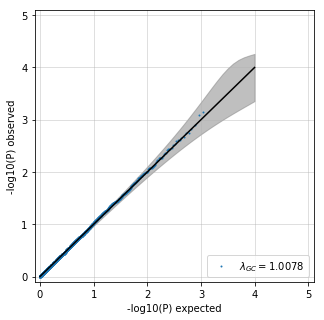

In [4]:
# import the algorithm
from fastlmm.association import single_snp_scale

# set up data
##############################
bed_fn = "../../tests/datasets/synth/all"
pheno_fn = "../../tests/datasets/synth/pheno_10_causals.txt"
cov_fn = "../../tests/datasets/synth/cov.txt"

# run gwas
###################################################################
results_df = single_snp_scale(bed_fn,  pheno_fn, covar=cov_fn, count_A1=False,cache=r'm:\deldir\cachetest2')#!!!cmk whant cache?

# manhattan plot
import pylab
import fastlmm.util as flutil
flutil.manhattan_plot(results_df[["Chr", "ChrPos", "PValue"]].values,pvalue_line=1e-5,xaxis_unit_bp=False)
pylab.show()

# qq plot
from fastlmm.util.stats import plotp
plotp.qqplot(results_df["PValue"].values, xlim=[0,5], ylim=[0,5])

# print head of results data frame
import pandas as pd
pd.set_option('display.width', 1000)
results_df.head(n=10)

In [5]:
import os
import multiprocessing
from pysnptools.util.filecache import LocalCache
from pysnptools.snpreader import SnpGen
from pysnptools.snpreader import DistributedBed
from pysnptools.util.mapreduce1.runner import LocalMultiProc

seed = 1
iid_count = 250*1000 # number of individuals, e.g. 1000000
sid_count = 10*1000 # number of SNPs, e.g. 1000000
chrom_count = 10
piece_per_chrom_count = 25 #Number of pieces for each chromosome, e.g. 100

storage = LocalCache(r'd:\deldir\testsnps_{0}_{1}_{2}_{3}\data'.format(seed,chrom_count,iid_count,sid_count))

In [3]:
logging.getLogger().setLevel(logging.INFO) #Set logging level to INFO to see more. Set to WARN to see less.tree_cache.rmtree() # remove all intermediate files

storage.rmtree()
snpgen = SnpGen(seed=seed,iid_count=iid_count,sid_count=sid_count,chrom_count=chrom_count) #Create an on-the-fly SNP generator
cpu_count = 5 #multiprocessing.cpu_count()

runner = None#LocalMultiProc(cpu_count)

snpreader = DistributedBed.write(storage,snpgen,piece_per_chrom_count=piece_per_chrom_count,runner=runner)
print snpreader

INFO:root:rmtree -- d:/deldir/testsnps_1_10_250000_10000/data


working on snpgen batch 0 of 1
open_write('chrom1.piece0of25.bim',size=0)
open_write('chrom1.piece0of25.fam',size=0)
open_write('chrom1.piece0of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom1.piece0of25.bed
close('chrom1.piece0of25.bim')
close('chrom1.piece0of25.fam')
close('chrom1.piece0of25.bed')
working on snpgen batch 0 of 1
open_write('chrom1.piece1of25.bim',size=0)
open_write('chrom1.piece1of25.fam',size=0)
open_write('chrom1.piece1of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom1.piece1of25.bed
close('chrom1.piece1of25.bim')
close('chrom1.piece1of25.fam')
close('chrom1.piece1of25.bed')
working on snpgen batch 0 of 1
open_write('chrom1.piece2of25.bim',size=0)
open_write('chrom1.piece2of25.fam',size=0)
open_write('chrom1.piece2of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom1.piece2of25.bed
close('chrom1.piece2of25.bim')
close('chrom1.piece2of25.fam')
close('chrom1.piece2of25.bed')
working on

Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom1.piece24of25.bed
close('chrom1.piece24of25.bim')
close('chrom1.piece24of25.fam')
close('chrom1.piece24of25.bed')
working on snpgen batch 1 of 1
open_write('chrom2.piece0of25.bim',size=0)
open_write('chrom2.piece0of25.fam',size=0)
open_write('chrom2.piece0of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom2.piece0of25.bed
close('chrom2.piece0of25.bim')
close('chrom2.piece0of25.fam')
close('chrom2.piece0of25.bed')
working on snpgen batch 1 of 1
open_write('chrom2.piece1of25.bim',size=0)
open_write('chrom2.piece1of25.fam',size=0)
open_write('chrom2.piece1of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom2.piece1of25.bed
close('chrom2.piece1of25.bim')
close('chrom2.piece1of25.fam')
close('chrom2.piece1of25.bed')
working on snpgen batch 1 of 1
open_write('chrom2.piece2of25.bim',size=0)
open_write('chrom2.piece2of25.fam',size=0)
open_write('chrom2.piece2of25.bed',size=0)
Done w

open_write('chrom2.piece24of25.bim',size=0)
open_write('chrom2.piece24of25.fam',size=0)
open_write('chrom2.piece24of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom2.piece24of25.bed
close('chrom2.piece24of25.bim')
close('chrom2.piece24of25.fam')
close('chrom2.piece24of25.bed')
working on snpgen batch 2 of 1
open_write('chrom3.piece0of25.bim',size=0)
open_write('chrom3.piece0of25.fam',size=0)
open_write('chrom3.piece0of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom3.piece0of25.bed
close('chrom3.piece0of25.bim')
close('chrom3.piece0of25.fam')
close('chrom3.piece0of25.bed')
working on snpgen batch 2 of 1
open_write('chrom3.piece1of25.bim',size=0)
open_write('chrom3.piece1of25.fam',size=0)
open_write('chrom3.piece1of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom3.piece1of25.bed
close('chrom3.piece1of25.bim')
close('chrom3.piece1of25.fam')
close('chrom3.piece1of25.bed')
working on snpgen batch 2 of 1
ope

close('chrom3.piece23of25.bim')
close('chrom3.piece23of25.fam')
close('chrom3.piece23of25.bed')
working on snpgen batch 3 of 1
open_write('chrom3.piece24of25.bim',size=0)
open_write('chrom3.piece24of25.fam',size=0)
open_write('chrom3.piece24of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom3.piece24of25.bed
close('chrom3.piece24of25.bim')
close('chrom3.piece24of25.fam')
close('chrom3.piece24of25.bed')
working on snpgen batch 3 of 1
open_write('chrom4.piece0of25.bim',size=0)
open_write('chrom4.piece0of25.fam',size=0)
open_write('chrom4.piece0of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom4.piece0of25.bed
close('chrom4.piece0of25.bim')
close('chrom4.piece0of25.fam')
close('chrom4.piece0of25.bed')
working on snpgen batch 3 of 1
open_write('chrom4.piece1of25.bim',size=0)
open_write('chrom4.piece1of25.fam',size=0)
open_write('chrom4.piece1of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom4.piece1of25.bed


open_write('chrom4.piece23of25.fam',size=0)
open_write('chrom4.piece23of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom4.piece23of25.bed
close('chrom4.piece23of25.bim')
close('chrom4.piece23of25.fam')
close('chrom4.piece23of25.bed')
working on snpgen batch 4 of 1
open_write('chrom4.piece24of25.bim',size=0)
open_write('chrom4.piece24of25.fam',size=0)
open_write('chrom4.piece24of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom4.piece24of25.bed
close('chrom4.piece24of25.bim')
close('chrom4.piece24of25.fam')
close('chrom4.piece24of25.bed')
working on snpgen batch 4 of 1
open_write('chrom5.piece0of25.bim',size=0)
open_write('chrom5.piece0of25.fam',size=0)
open_write('chrom5.piece0of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom5.piece0of25.bed
close('chrom5.piece0of25.bim')
close('chrom5.piece0of25.fam')
close('chrom5.piece0of25.bed')
working on snpgen batch 4 of 1
open_write('chrom5.piece1of25.bim',size=

close('chrom5.piece22of25.bim')
close('chrom5.piece22of25.fam')
close('chrom5.piece22of25.bed')
working on snpgen batch 5 of 1
open_write('chrom5.piece23of25.bim',size=0)
open_write('chrom5.piece23of25.fam',size=0)
open_write('chrom5.piece23of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom5.piece23of25.bed
close('chrom5.piece23of25.bim')
close('chrom5.piece23of25.fam')
close('chrom5.piece23of25.bed')
working on snpgen batch 5 of 1
open_write('chrom5.piece24of25.bim',size=0)
open_write('chrom5.piece24of25.fam',size=0)
open_write('chrom5.piece24of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom5.piece24of25.bed
close('chrom5.piece24of25.bim')
close('chrom5.piece24of25.fam')
close('chrom5.piece24of25.bed')
working on snpgen batch 5 of 1
open_write('chrom6.piece0of25.bim',size=0)
open_write('chrom6.piece0of25.fam',size=0)
open_write('chrom6.piece0of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom6.piece0of

open_write('chrom6.piece22of25.fam',size=0)
open_write('chrom6.piece22of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom6.piece22of25.bed
close('chrom6.piece22of25.bim')
close('chrom6.piece22of25.fam')
close('chrom6.piece22of25.bed')
working on snpgen batch 6 of 1
open_write('chrom6.piece23of25.bim',size=0)
open_write('chrom6.piece23of25.fam',size=0)
open_write('chrom6.piece23of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom6.piece23of25.bed
close('chrom6.piece23of25.bim')
close('chrom6.piece23of25.fam')
close('chrom6.piece23of25.bed')
working on snpgen batch 6 of 1
open_write('chrom6.piece24of25.bim',size=0)
open_write('chrom6.piece24of25.fam',size=0)
open_write('chrom6.piece24of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom6.piece24of25.bed
close('chrom6.piece24of25.bim')
close('chrom6.piece24of25.fam')
close('chrom6.piece24of25.bed')
working on snpgen batch 6 of 1
open_write('chrom7.piece0of25.bim

close('chrom7.piece21of25.bim')
close('chrom7.piece21of25.fam')
close('chrom7.piece21of25.bed')
working on snpgen batch 7 of 1
open_write('chrom7.piece22of25.bim',size=0)
open_write('chrom7.piece22of25.fam',size=0)
open_write('chrom7.piece22of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom7.piece22of25.bed
close('chrom7.piece22of25.bim')
close('chrom7.piece22of25.fam')
close('chrom7.piece22of25.bed')
working on snpgen batch 7 of 1
open_write('chrom7.piece23of25.bim',size=0)
open_write('chrom7.piece23of25.fam',size=0)
open_write('chrom7.piece23of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom7.piece23of25.bed
close('chrom7.piece23of25.bim')
close('chrom7.piece23of25.fam')
close('chrom7.piece23of25.bed')
working on snpgen batch 7 of 1
open_write('chrom7.piece24of25.bim',size=0)
open_write('chrom7.piece24of25.fam',size=0)
open_write('chrom7.piece24of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom7.piece

open_write('chrom8.piece21of25.fam',size=0)
open_write('chrom8.piece21of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom8.piece21of25.bed
close('chrom8.piece21of25.bim')
close('chrom8.piece21of25.fam')
close('chrom8.piece21of25.bed')
working on snpgen batch 8 of 1
open_write('chrom8.piece22of25.bim',size=0)
open_write('chrom8.piece22of25.fam',size=0)
open_write('chrom8.piece22of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom8.piece22of25.bed
close('chrom8.piece22of25.bim')
close('chrom8.piece22of25.fam')
close('chrom8.piece22of25.bed')
working on snpgen batch 8 of 1
open_write('chrom8.piece23of25.bim',size=0)
open_write('chrom8.piece23of25.fam',size=0)
open_write('chrom8.piece23of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom8.piece23of25.bed
close('chrom8.piece23of25.bim')
close('chrom8.piece23of25.fam')
close('chrom8.piece23of25.bed')
working on snpgen batch 8 of 1
open_write('chrom8.piece24of25.bi

close('chrom9.piece20of25.bim')
close('chrom9.piece20of25.fam')
close('chrom9.piece20of25.bed')
working on snpgen batch 9 of 1
open_write('chrom9.piece21of25.bim',size=0)
open_write('chrom9.piece21of25.fam',size=0)
open_write('chrom9.piece21of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom9.piece21of25.bed
close('chrom9.piece21of25.bim')
close('chrom9.piece21of25.fam')
close('chrom9.piece21of25.bed')
working on snpgen batch 9 of 1
open_write('chrom9.piece22of25.bim',size=0)
open_write('chrom9.piece22of25.fam',size=0)
open_write('chrom9.piece22of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom9.piece22of25.bed
close('chrom9.piece22of25.bim')
close('chrom9.piece22of25.fam')
close('chrom9.piece22of25.bed')
working on snpgen batch 9 of 1
open_write('chrom9.piece23of25.bim',size=0)
open_write('chrom9.piece23of25.fam',size=0)
open_write('chrom9.piece23of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom9.piece

close('chrom10.piece19of25.bed')
working on snpgen batch 9 of 1
open_write('chrom10.piece20of25.bim',size=0)
open_write('chrom10.piece20of25.fam',size=0)
open_write('chrom10.piece20of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom10.piece20of25.bed
close('chrom10.piece20of25.bim')
close('chrom10.piece20of25.fam')
close('chrom10.piece20of25.bed')
working on snpgen batch 9 of 1
open_write('chrom10.piece21of25.bim',size=0)
open_write('chrom10.piece21of25.fam',size=0)
open_write('chrom10.piece21of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom10.piece21of25.bed
close('chrom10.piece21of25.bim')
close('chrom10.piece21of25.fam')
close('chrom10.piece21of25.bed')
working on snpgen batch 9 of 1
open_write('chrom10.piece22of25.bim',size=0)
open_write('chrom10.piece22of25.fam',size=0)
open_write('chrom10.piece22of25.bed',size=0)
Done writing d:/deldir/testsnps_1_10_250000_10000/data/chrom10.piece22of25.bed
close('chrom10.piece22of25.bim')
c

open_read('chrom2.piece23of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom2.piece23of25.bim
open_read('chrom2.piece24of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom2.piece24of25.bim
_MergeCols looking at reader #50: _Distributed1Bed('chrom3.piece0of25.bed','LocalCache('d:/deldir/testsnps_1_10_250000_10000/data')')
open_read('chrom3.piece0of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom3.piece0of25.bim
open_read('chrom3.piece1of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom3.piece1of25.bim
open_read('chrom3.piece2of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom3.piece2of25.bim
open_read('chrom3.piece3of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom3.piece3of25.bim
open_read('chrom3.piece4of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom3.piece4of25.bim
open_read('chrom3.piece5of25.bim')
Loading bim fil

open_read('chrom5.piece10of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom5.piece10of25.bim
open_read('chrom5.piece11of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom5.piece11of25.bim
open_read('chrom5.piece12of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom5.piece12of25.bim
open_read('chrom5.piece13of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom5.piece13of25.bim
open_read('chrom5.piece14of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom5.piece14of25.bim
open_read('chrom5.piece15of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom5.piece15of25.bim
open_read('chrom5.piece16of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom5.piece16of25.bim
open_read('chrom5.piece17of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom5.piece17of25.bim
open_read('chrom5.piece18of25.bim')
Loading bim file d:/

open_read('chrom7.piece23of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom7.piece23of25.bim
open_read('chrom7.piece24of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom7.piece24of25.bim
open_read('chrom8.piece0of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom8.piece0of25.bim
open_read('chrom8.piece1of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom8.piece1of25.bim
open_read('chrom8.piece2of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom8.piece2of25.bim
open_read('chrom8.piece3of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom8.piece3of25.bim
open_read('chrom8.piece4of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom8.piece4of25.bim
_MergeCols looking at reader #180: _Distributed1Bed('chrom8.piece5of25.bed','LocalCache('d:/deldir/testsnps_1_10_250000_10000/data')')
open_read('chrom8.piece5of25.bim')
Loading bim fi

open_read('chrom10.piece11of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom10.piece11of25.bim
open_read('chrom10.piece12of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom10.piece12of25.bim
open_read('chrom10.piece13of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom10.piece13of25.bim
open_read('chrom10.piece14of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom10.piece14of25.bim
_MergeCols looking at reader #240: _Distributed1Bed('chrom10.piece15of25.bed','LocalCache('d:/deldir/testsnps_1_10_250000_10000/data')')
open_read('chrom10.piece15of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom10.piece15of25.bim
open_read('chrom10.piece16of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom10.piece16of25.bim
open_read('chrom10.piece17of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom10.piece17of25.bim
open_read('chrom10.piec

close('chrom2.piece24of25.bim')
close('chrom2.piece23of25.bim')
close('chrom2.piece22of25.bim')
close('chrom2.piece21of25.bim')
close('chrom2.piece20of25.bim')
close('chrom2.piece19of25.bim')
close('chrom2.piece18of25.bim')
close('chrom2.piece17of25.bim')
close('chrom2.piece16of25.bim')
close('chrom2.piece15of25.bim')
close('chrom2.piece14of25.bim')
close('chrom2.piece13of25.bim')
close('chrom2.piece12of25.bim')
close('chrom2.piece11of25.bim')
close('chrom2.piece10of25.bim')
close('chrom2.piece9of25.bim')
close('chrom2.piece8of25.bim')
close('chrom2.piece7of25.bim')
close('chrom2.piece6of25.bim')
close('chrom2.piece5of25.bim')
close('chrom2.piece4of25.bim')
close('chrom2.piece3of25.bim')
close('chrom2.piece2of25.bim')
close('chrom2.piece1of25.bim')
close('chrom2.piece0of25.bim')
close('chrom1.piece24of25.bim')
close('chrom1.piece23of25.bim')
close('chrom1.piece22of25.bim')
close('chrom1.piece21of25.bim')
close('chrom1.piece20of25.bim')
close('chrom1.piece19of25.bim')
close('chrom1.piec

In [6]:
from pysnptools.util.filecache import LocalCache
from pysnptools.snpreader import DistributedBed

test_snps = DistributedBed(storage)
test_snps.shape

(250000, 10000)

In [7]:
#Generate random pheno and covar
import numpy as np
from pysnptools.snpreader import SnpData
np.random.seed(seed)
pheno = SnpData(iid=test_snps.iid,sid=['pheno'],val=np.random.randn(test_snps.iid_count,1)*3+2)
covar = SnpData(iid=test_snps.iid,sid=['covar1','covar2'],val=np.random.randn(test_snps.iid_count,2)*2-3)

In [7]:
chrom1 = test_snps.pos[:,0]==1
real_test_snps = test_snps[:,chrom1]
real_test_snps.shape

(250000, 1365)

In [8]:
%%time
import logging
from fastlmm.association import single_snp

logging.getLogger().setLevel(logging.INFO) #Set logging level to INFO to see more. Set to WARN to see less.
results_df1 = single_snp(real_test_snps, pheno, G0=test_snps, covar=covar, count_A1=True)
results_df1

Setting GB_goal to 152.924438204 GB
Starting read from 225 subreaders
Reading from #25: _Distributed1Bed('chrom2.piece0of25.bed','LocalCache('d:/deldir/testsnps_1_10_250000_10000/data')')
open_read('chrom2.piece0of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom2.piece0of25.bim
open_read('chrom2.piece0of25.bed')
Reading from #26: _Distributed1Bed('chrom2.piece1of25.bed','LocalCache('d:/deldir/testsnps_1_10_250000_10000/data')')
open_read('chrom2.piece1of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom2.piece1of25.bim
open_read('chrom2.piece1of25.bed')
Reading from #27: _Distributed1Bed('chrom2.piece2of25.bed','LocalCache('d:/deldir/testsnps_1_10_250000_10000/data')')
open_read('chrom2.piece2of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom2.piece2of25.bim
open_read('chrom2.piece2of25.bed')
Reading from #28: _Distributed1Bed('chrom2.piece3of25.bed','LocalCache('d:/deldir/testsnps_1_10_250000_10000/data')')
open_

Reading from #55: _Distributed1Bed('chrom3.piece5of25.bed','LocalCache('d:/deldir/testsnps_1_10_250000_10000/data')')
open_read('chrom3.piece5of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom3.piece5of25.bim
open_read('chrom3.piece5of25.bed')
Reading from #56: _Distributed1Bed('chrom3.piece6of25.bed','LocalCache('d:/deldir/testsnps_1_10_250000_10000/data')')
open_read('chrom3.piece6of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom3.piece6of25.bim
open_read('chrom3.piece6of25.bed')
Reading from #57: _Distributed1Bed('chrom3.piece7of25.bed','LocalCache('d:/deldir/testsnps_1_10_250000_10000/data')')
open_read('chrom3.piece7of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom3.piece7of25.bim
open_read('chrom3.piece7of25.bed')
Reading from #58: _Distributed1Bed('chrom3.piece8of25.bed','LocalCache('d:/deldir/testsnps_1_10_250000_10000/data')')
open_read('chrom3.piece8of25.bim')
Loading bim file d:/deldir/testsnps_1_10

open_read('chrom4.piece10of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom4.piece10of25.bim
open_read('chrom4.piece10of25.bed')
Reading from #86: _Distributed1Bed('chrom4.piece11of25.bed','LocalCache('d:/deldir/testsnps_1_10_250000_10000/data')')
open_read('chrom4.piece11of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom4.piece11of25.bim
open_read('chrom4.piece11of25.bed')
Reading from #87: _Distributed1Bed('chrom4.piece12of25.bed','LocalCache('d:/deldir/testsnps_1_10_250000_10000/data')')
open_read('chrom4.piece12of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom4.piece12of25.bim
open_read('chrom4.piece12of25.bed')
Reading from #88: _Distributed1Bed('chrom4.piece13of25.bed','LocalCache('d:/deldir/testsnps_1_10_250000_10000/data')')
open_read('chrom4.piece13of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom4.piece13of25.bim
open_read('chrom4.piece13of25.bed')
Reading from #89: _Distribu

Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom5.piece15of25.bim
open_read('chrom5.piece15of25.bed')
Reading from #116: _Distributed1Bed('chrom5.piece16of25.bed','LocalCache('d:/deldir/testsnps_1_10_250000_10000/data')')
open_read('chrom5.piece16of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom5.piece16of25.bim
open_read('chrom5.piece16of25.bed')
Reading from #117: _Distributed1Bed('chrom5.piece17of25.bed','LocalCache('d:/deldir/testsnps_1_10_250000_10000/data')')
open_read('chrom5.piece17of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom5.piece17of25.bim
open_read('chrom5.piece17of25.bed')
Reading from #118: _Distributed1Bed('chrom5.piece18of25.bed','LocalCache('d:/deldir/testsnps_1_10_250000_10000/data')')
open_read('chrom5.piece18of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom5.piece18of25.bim
open_read('chrom5.piece18of25.bed')
Reading from #119: _Distributed1Bed('chrom5.piece19of25.bed'

open_read('chrom6.piece20of25.bed')
Reading from #146: _Distributed1Bed('chrom6.piece21of25.bed','LocalCache('d:/deldir/testsnps_1_10_250000_10000/data')')
open_read('chrom6.piece21of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom6.piece21of25.bim
open_read('chrom6.piece21of25.bed')
Reading from #147: _Distributed1Bed('chrom6.piece22of25.bed','LocalCache('d:/deldir/testsnps_1_10_250000_10000/data')')
open_read('chrom6.piece22of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom6.piece22of25.bim
open_read('chrom6.piece22of25.bed')
Reading from #148: _Distributed1Bed('chrom6.piece23of25.bed','LocalCache('d:/deldir/testsnps_1_10_250000_10000/data')')
open_read('chrom6.piece23of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom6.piece23of25.bim
open_read('chrom6.piece23of25.bed')
Reading from #149: _Distributed1Bed('chrom6.piece24of25.bed','LocalCache('d:/deldir/testsnps_1_10_250000_10000/data')')
open_read('chrom6.piec

Reading from #176: _Distributed1Bed('chrom8.piece1of25.bed','LocalCache('d:/deldir/testsnps_1_10_250000_10000/data')')
open_read('chrom8.piece1of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom8.piece1of25.bim
open_read('chrom8.piece1of25.bed')
Reading from #177: _Distributed1Bed('chrom8.piece2of25.bed','LocalCache('d:/deldir/testsnps_1_10_250000_10000/data')')
open_read('chrom8.piece2of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom8.piece2of25.bim
open_read('chrom8.piece2of25.bed')
Reading from #178: _Distributed1Bed('chrom8.piece3of25.bed','LocalCache('d:/deldir/testsnps_1_10_250000_10000/data')')
open_read('chrom8.piece3of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom8.piece3of25.bim
open_read('chrom8.piece3of25.bed')
Reading from #179: _Distributed1Bed('chrom8.piece4of25.bed','LocalCache('d:/deldir/testsnps_1_10_250000_10000/data')')
open_read('chrom8.piece4of25.bim')
Loading bim file d:/deldir/testsnps_

open_read('chrom9.piece6of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom9.piece6of25.bim
open_read('chrom9.piece6of25.bed')
Reading from #207: _Distributed1Bed('chrom9.piece7of25.bed','LocalCache('d:/deldir/testsnps_1_10_250000_10000/data')')
open_read('chrom9.piece7of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom9.piece7of25.bim
open_read('chrom9.piece7of25.bed')
Reading from #208: _Distributed1Bed('chrom9.piece8of25.bed','LocalCache('d:/deldir/testsnps_1_10_250000_10000/data')')
open_read('chrom9.piece8of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom9.piece8of25.bim
open_read('chrom9.piece8of25.bed')
Reading from #209: _Distributed1Bed('chrom9.piece9of25.bed','LocalCache('d:/deldir/testsnps_1_10_250000_10000/data')')
open_read('chrom9.piece9of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom9.piece9of25.bim
open_read('chrom9.piece9of25.bed')
Reading from #210: _Distributed1Bed('ch

open_read('chrom10.piece11of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom10.piece11of25.bim
open_read('chrom10.piece11of25.bed')
Reading from #237: _Distributed1Bed('chrom10.piece12of25.bed','LocalCache('d:/deldir/testsnps_1_10_250000_10000/data')')
open_read('chrom10.piece12of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom10.piece12of25.bim
open_read('chrom10.piece12of25.bed')
Reading from #238: _Distributed1Bed('chrom10.piece13of25.bed','LocalCache('d:/deldir/testsnps_1_10_250000_10000/data')')
open_read('chrom10.piece13of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom10.piece13of25.bim
open_read('chrom10.piece13of25.bed')
Reading from #239: _Distributed1Bed('chrom10.piece14of25.bed','LocalCache('d:/deldir/testsnps_1_10_250000_10000/data')')
open_read('chrom10.piece14of25.bim')
Loading bim file d:/deldir/testsnps_1_10_250000_10000/data/chrom10.piece14of25.bim
open_read('chrom10.piece14of25.bed')
Reading f

MemoryError: 

In [ ]:
import pylab
import fastlmm.util.util as flutil
flutil.manhattan_plot(results_df1[["Chr", "ChrPos", "PValue"]].values,pvalue_line=1e-5,xaxis_unit_bp=False)
pylab.show()

# qq plot
from fastlmm.util.stats import plotp
plotp.qqplot(results_df1["PValue"].values, xlim=[0,5], ylim=[0,5])

# print head of results data frame
import pandas as pd
pd.set_option('display.width', 1000)
results_df1.head(n=10)

In [8]:
%%time
import logging
from pysnptools.util.mapreduce1.runner import LocalMultiProc
logging.getLogger().setLevel(logging.INFO) #Set logging level to INFO to see more. Set to WARN to see less.
# import the algorithm
from fastlmm.association import single_snp_scale

# run gwas
###################################################################
#!!!cmk from fastlmm.ludicrous.file_cache import LocalCache
#!!!cmk storage = LocalCache(r'm:\deldir\cache3')
#storage.rmtree()
runner = LocalMultiProc(10)
#!!!cmk cache_dict={chrom:storage for chrom in xrange(23)}
results_df = single_snp_scale(test_snps, pheno, G0=test_snps, covar=covar, cache=r'm:\deldir\cache4', runner=runner)
results_df

open_read('ss_per_snp.npz')
close('ss_per_snp.npz')
test_snps has sid_count of 10000
test_snps_chrom(1) has sid_count of 1365
work_count = 25
test_snps has sid_count of 10000
test_snps_chrom(2) has sid_count of 1324
work_count = 25
test_snps has sid_count of 10000
test_snps_chrom(3) has sid_count of 1110
work_count = 25
test_snps has sid_count of 10000
test_snps_chrom(4) has sid_count of 1054
work_count = 25
test_snps has sid_count of 10000
test_snps_chrom(5) has sid_count of 1006
work_count = 25
test_snps has sid_count of 10000
test_snps_chrom(6) has sid_count of 950
work_count = 25
test_snps has sid_count of 10000
test_snps_chrom(7) has sid_count of 887
work_count = 25
test_snps has sid_count of 10000
test_snps_chrom(8) has sid_count of 805
work_count = 25
test_snps has sid_count of 10000
test_snps_chrom(9) has sid_count of 752
work_count = 25
test_snps has sid_count of 10000
test_snps_chrom(10) has sid_count of 747
work_count = 25


KeyboardInterrupt: 

In [ ]:
# manhattan plot
import pylab
import fastlmm.util.util as flutil
flutil.manhattan_plot(results_df[["Chr", "ChrPos", "PValue"]].values,pvalue_line=1e-5,xaxis_unit_bp=False)
pylab.show()

# qq plot
from fastlmm.util.stats import plotp
plotp.qqplot(results_df["PValue"].values, xlim=[0,5], ylim=[0,5])

# print head of results data frame
import pandas as pd
pd.set_option('display.width', 1000)
results_df.head(n=10)

In [ ]:
import pylab
import fastlmm.util.util as flutil
flutil.manhattan_plot(results_df[["Chr", "ChrPos", "PValue"]].values,pvalue_line=1e-5,xaxis_unit_bp=False)
pylab.show()

# qq plot
from fastlmm.util.stats import plotp
plotp.qqplot(results_df["PValue"].values, xlim=[0,5], ylim=[0,5])

# print head of results data frame
import pandas as pd
pd.set_option('display.width', 1000)
results_df.head(n=10)